In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from help_functions import neutralize, normalize, truncate, prof, get_cumpnl, get_cumpnl_year, get_drawdown_years, get_sharpe_year, AlphaStats, calc_drawdown,calc_sharpe,cumpnl,corr,cut_middle,cut_outliers,volatility,rank_vector,ret_matrix,turnover,decay,prof_year,sharpe

In [29]:
close = pd.read_csv('.\Close.csv', index_col=0).T
opn = pd.read_csv('.\Open.csv', index_col=0).T
high = pd.read_csv('.\High.csv', index_col=0).T
low = pd.read_csv('.\Low.csv', index_col=0).T
volume = pd.read_csv('.\Volume.csv', index_col=0).T


close.index = pd.to_datetime(close.index)
opn.index = pd.to_datetime(opn.index)
high.index = pd.to_datetime(high.index)
low.index = pd.to_datetime(low.index)
volume.index = pd.to_datetime(volume.index)

In [5]:
alpha_1 = -(close.shift(1)/close.shift(6)).fillna(0)
alpha_1 = normalize(neutralize(truncate(alpha_1))).fillna(0)

AlphaStats(alpha_1,close)

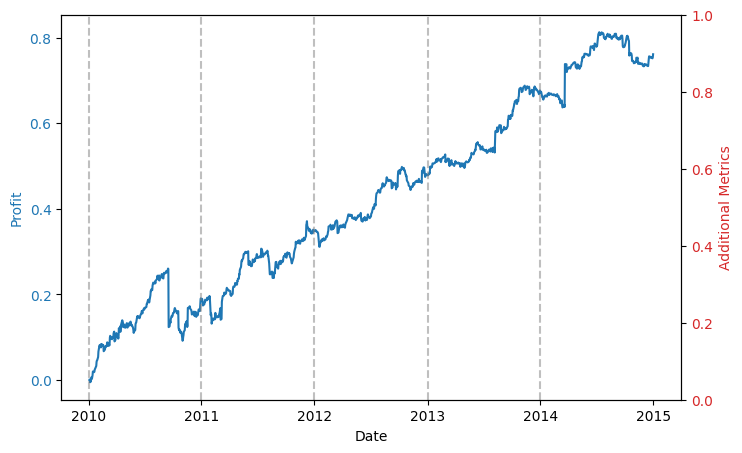

,Profit,Profit_year,Sharpe Ratio,Max Profit Year,Max Drawdown,Turnovers(Mean)
0,0.186228,0.186228,1.075342,0.19646,0.168832,0.699187
1,0.348061,0.161833,1.436321,0.19646,0.168832,0.699187
2,0.478789,0.130728,1.462838,0.19646,0.168832,0.699187
3,0.675249,0.196460,2.433427,0.19646,0.168832,0.699187
4,0.761135,0.085886,0.679576,0.19646,0.168832,0.699187


In [34]:
alpha3 = 1-(high*(close - opn)/close).shift(1)

alpha3 = normalize(neutralize(truncate(alpha3)))

AlphaStats(alpha3,close)

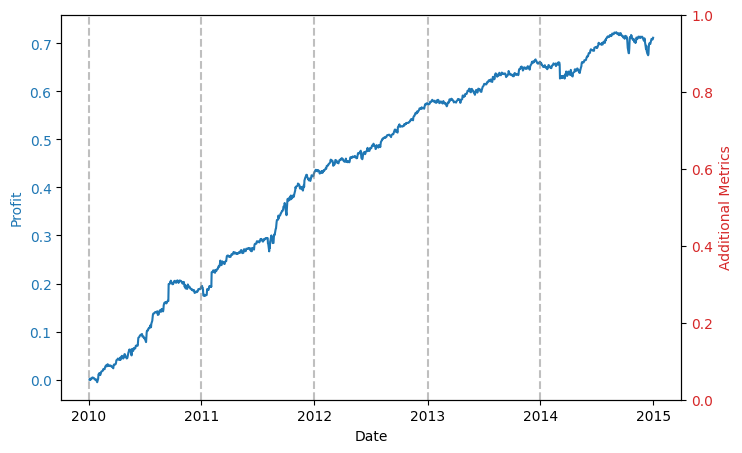

,Profit,Profit_year,Sharpe Ratio,Max Profit Year,Max Drawdown,Turnovers(Mean)
0,0.190806,0.190806,3.233171,0.236955,0.047968,0.284373
1,0.427761,0.236955,3.340237,0.236955,0.047968,0.284373
2,0.575304,0.147543,3.677997,0.236955,0.047968,0.284373
3,0.660902,0.085599,2.238668,0.236955,0.047968,0.284373
4,0.711417,0.050515,0.800561,0.236955,0.047968,0.284373


In [15]:
alpha_4 = (-close/opn).shift(1)

alpha4 = normalize(neutralize(truncate(alpha_4)))

alpha44 = normalize(neutralize(decay(alpha4,5)))

AlphaStats(alpha44,close)

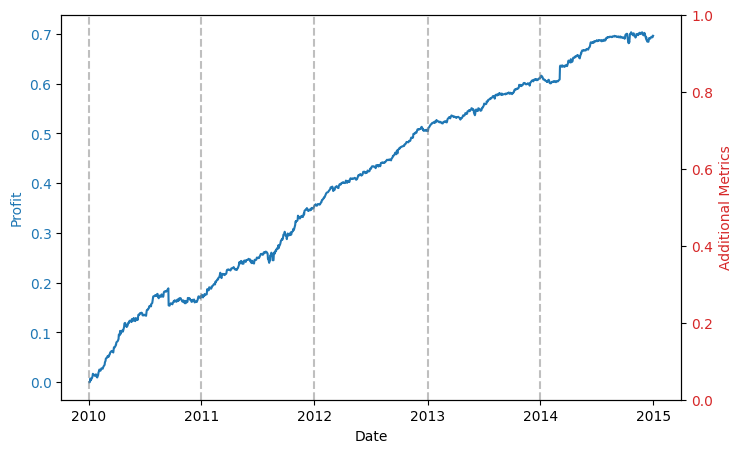

,Profit,Profit_year,Sharpe Ratio,Max Profit Year,Max Drawdown,Turnovers(Mean)
0,0.171462,0.171462,3.221501,0.180124,0.034895,0.303405
1,0.351586,0.180124,3.929261,0.180124,0.034895,0.303405
2,0.504870,0.153284,5.652858,0.180124,0.034895,0.303405
3,0.611531,0.106661,4.225381,0.180124,0.034895,0.303405
4,0.696245,0.084714,2.003151,0.180124,0.034895,0.303405


In [16]:
alpha5 = ((high + low - 2*close)/2*close).shift(1)

alpha5 = normalize(neutralize(truncate(alpha5)))
alpha5 = normalize(neutralize(decay(alpha5,4)))

AlphaStats(alpha5,close)


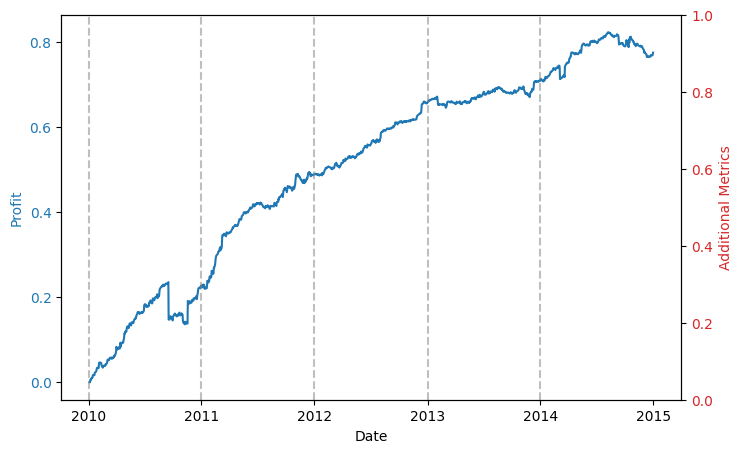

,Profit,Profit_year,Sharpe Ratio,Max Profit Year,Max Drawdown,Turnovers(Mean)
0,0.224835,0.224835,1.928009,0.263523,0.09899,0.5778
1,0.488359,0.263523,4.538418,0.263523,0.09899,0.5778
2,0.655938,0.167579,4.941473,0.263523,0.09899,0.5778
3,0.708201,0.052264,1.281829,0.263523,0.09899,0.5778
4,0.774205,0.066003,1.126071,0.263523,0.09899,0.5778


In [17]:
alpha6 = (0.5 -(close/close.shift(1))*(high - low.shift(1))).shift(1).fillna(0)

alpha6 = normalize(neutralize(truncate(alpha6)))

AlphaStats(alpha6,close)

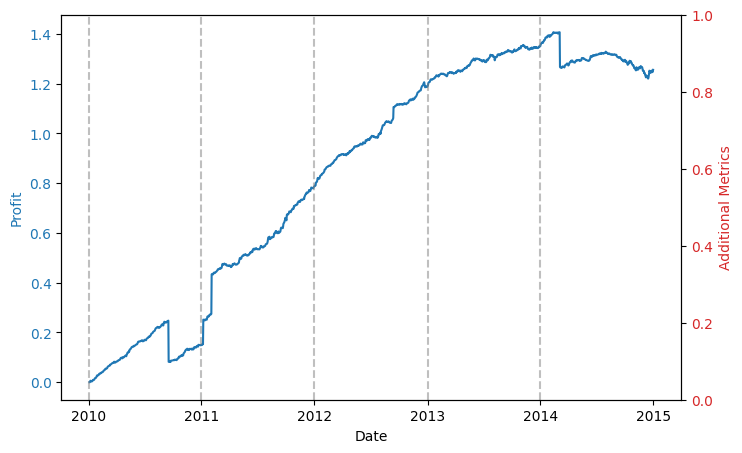

,Profit,Profit_year,Sharpe Ratio,Max Profit Year,Max Drawdown,Turnovers(Mean)
0,0.149086,0.149086,0.879463,0.635227,0.186333,0.064249
1,0.784312,0.635227,3.299353,0.635227,0.186333,0.064249
2,1.187101,0.402789,6.371271,0.635227,0.186333,0.064249
3,1.349674,0.162573,3.622110,0.635227,0.186333,0.064249
4,1.255358,-0.094316,-0.628795,0.635227,0.186333,0.064249


In [18]:
alpha7 = (high.shift(1)*2/close.shift(1)**2)
alpha7 = normalize(neutralize(truncate(alpha7))).fillna(0)

AlphaStats(alpha7,close)

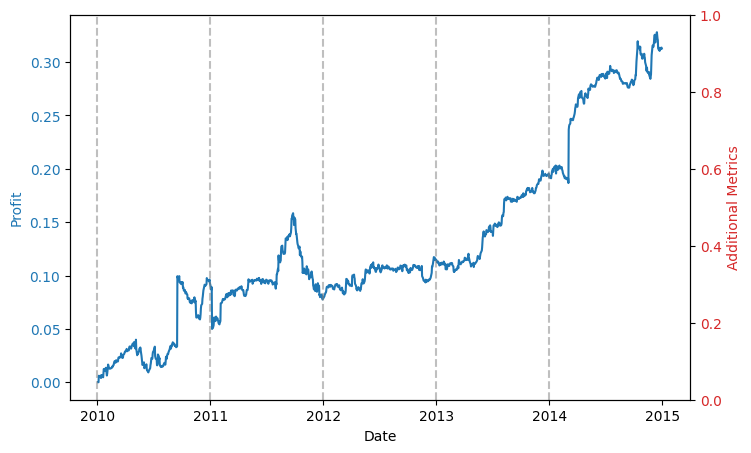

,Profit,Profit_year,Sharpe Ratio,Max Profit Year,Max Drawdown,Turnovers(Mean)
0,0.092977,0.092977,1.213085,0.117651,0.080842,0.671343
1,0.077572,-0.015405,-0.245756,0.117651,0.080842,0.671343
2,0.115089,0.037517,1.211353,0.117651,0.080842,0.671343
3,0.195085,0.079996,2.632293,0.117651,0.080842,0.671343
4,0.312736,0.117651,1.768650,0.117651,0.080842,0.671343


In [19]:
alpha8 = (low - opn)*close/(close**2).shift(1)
alpha8 = normalize(neutralize(truncate(alpha8,0.2)))

AlphaStats(alpha8,close)

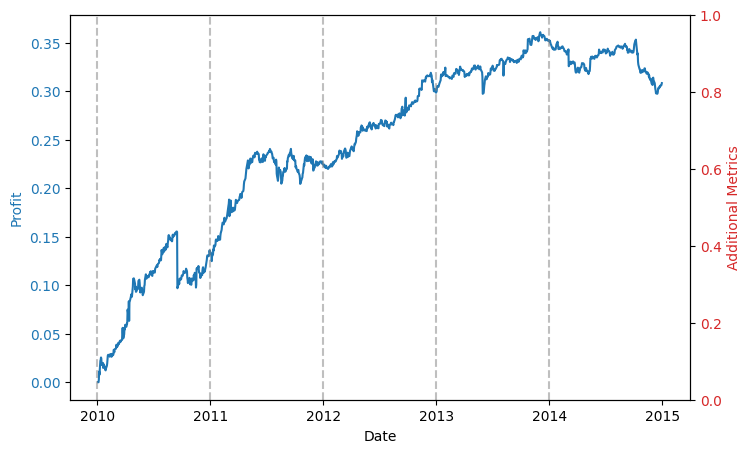

,Profit,Profit_year,Sharpe Ratio,Max Profit Year,Max Drawdown,Turnovers(Mean)
0,0.133644,0.133644,1.570327,0.133644,0.058455,0.727743
1,0.224786,0.091142,1.737065,0.133644,0.058455,0.727743
2,0.298411,0.073625,1.757104,0.133644,0.058455,0.727743
3,0.352533,0.054122,1.367676,0.133644,0.058455,0.727743
4,0.308319,-0.044213,-1.254304,0.133644,0.058455,0.727743


In [21]:
alpha9 = (-(close- opn)*low*(close**2)).shift(1)
alpha9 = normalize(neutralize(truncate(alpha9,0.5)))

AlphaStats(alpha9,close)

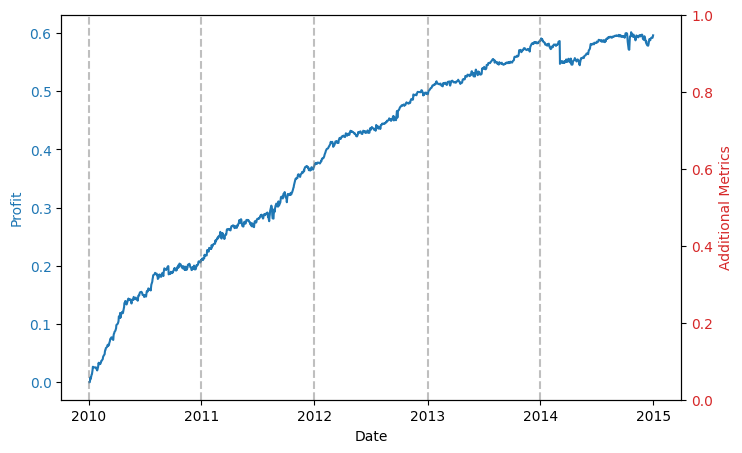

,Profit,Profit_year,Sharpe Ratio,Max Profit Year,Max Drawdown,Turnovers(Mean)
0,0.208668,0.208668,4.560947,0.208668,0.046082,0.233279
1,0.369024,0.160356,3.288209,0.208668,0.046082,0.233279
2,0.494942,0.125918,3.405744,0.208668,0.046082,0.233279
3,0.586010,0.091068,3.031277,0.208668,0.046082,0.233279
4,0.595721,0.009711,0.172519,0.208668,0.046082,0.233279


In [20]:
alpha10 = ((opn - close)*low*(close)*2).shift(1)
alpha10 = normalize(neutralize(truncate(alpha10)))
alpha10 =  normalize(neutralize(decay(alpha10,8)))


AlphaStats(alpha10,close)

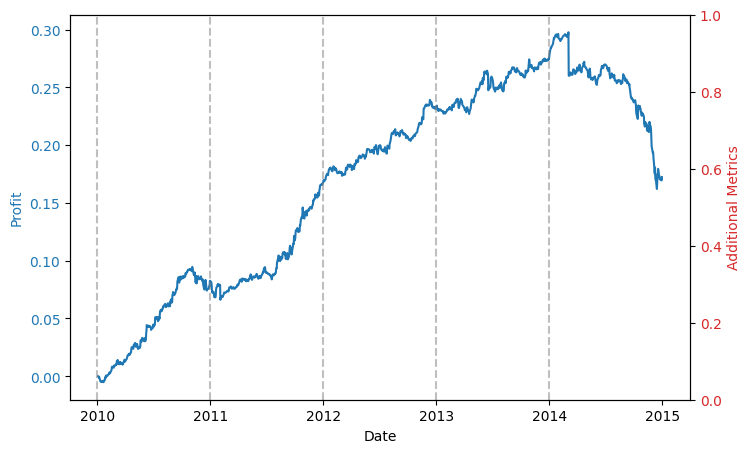

,Profit,Profit_year,Sharpe Ratio,Max Profit Year,Max Drawdown,Turnovers(Mean)
0,0.082598,0.082598,2.707740,0.08359,0.135652,0.504346
1,0.166187,0.083590,2.565869,0.08359,0.135652,0.504346
2,0.231648,0.065461,2.559195,0.08359,0.135652,0.504346
3,0.274158,0.042510,1.340094,0.08359,0.135652,0.504346
4,0.172394,-0.101764,-1.836865,0.08359,0.135652,0.504346


In [22]:
alpha2 = ((high - low)/close**2).shift(1)
alpha2 = normalize(neutralize(truncate(alpha2)))

AlphaStats(alpha2,close)

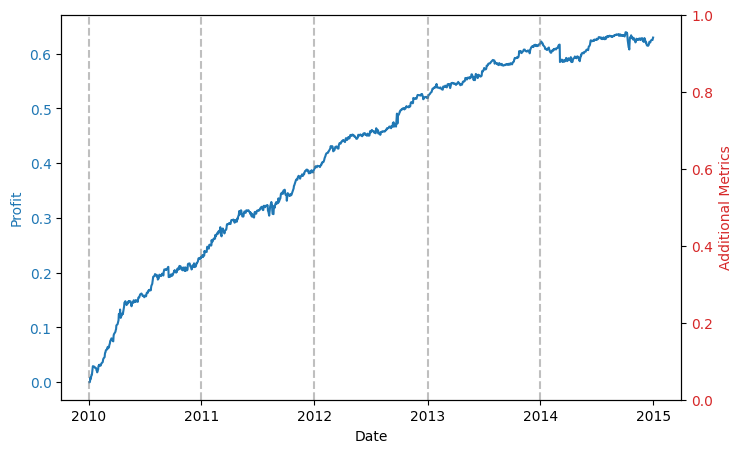

,Profit,Profit_year,Sharpe Ratio,Max Profit Year,Max Drawdown,Turnovers(Mean)
0,0.227236,0.227236,4.417511,0.227236,0.037611,0.289515
1,0.386767,0.159531,3.008340,0.227236,0.037611,0.289515
2,0.518930,0.132163,2.900495,0.227236,0.037611,0.289515
3,0.618176,0.099246,3.282525,0.227236,0.037611,0.289515
4,0.629324,0.011149,0.223933,0.227236,0.037611,0.289515


In [23]:
alpha99 = normalize(neutralize(decay(alpha9,5)))
AlphaStats(alpha99,close)

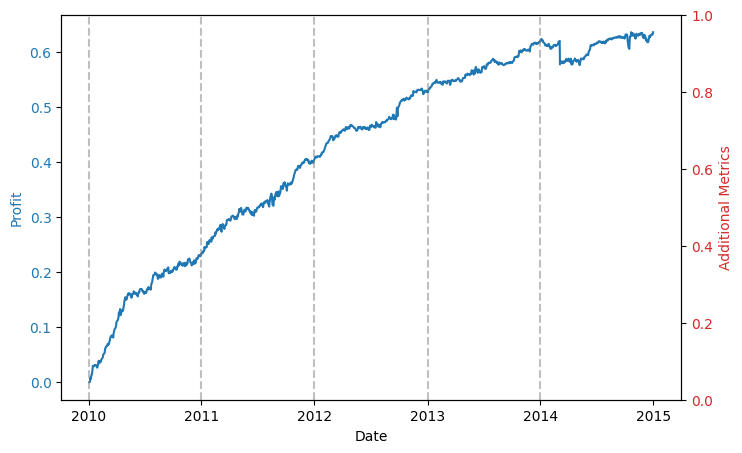

,Profit,Profit_year,Sharpe Ratio,Max Profit Year,Max Drawdown,Turnovers(Mean)
0,0.231702,0.231702,4.980890,0.231702,0.047335,0.211265
1,0.401705,0.170003,3.397807,0.231702,0.047335,0.211265
2,0.526369,0.124663,2.888156,0.231702,0.047335,0.211265
3,0.618361,0.091993,2.972475,0.231702,0.047335,0.211265
4,0.635334,0.016973,0.291252,0.231702,0.047335,0.211265


In [24]:
alpha999 = normalize(neutralize(decay(alpha9,10)))
AlphaStats(alpha999,close)

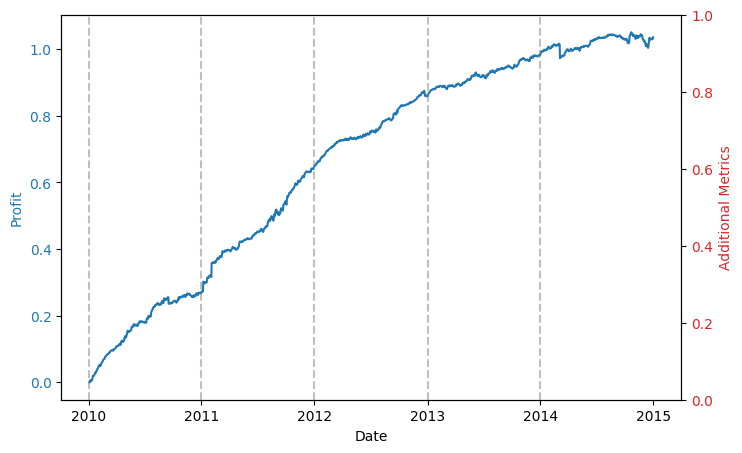

,Profit,Profit_year,Sharpe Ratio,Max Profit Year,Max Drawdown,Turnovers(Mean)
0,0.270252,0.270252,5.911306,0.374319,0.046888,0.07466
1,0.644571,0.374319,5.265090,0.374319,0.046888,0.07466
2,0.858601,0.214030,5.579950,0.374319,0.046888,0.07466
3,0.982075,0.123474,3.581276,0.374319,0.046888,0.07466
4,1.035767,0.053693,0.859932,0.374319,0.046888,0.07466


In [39]:
portfolio_1 = (alpha_1 + alpha2 + alpha3 + alpha44 + alpha5 + alpha8 + alpha10 + alpha6 + alpha7 + alpha99 +alpha9).fillna(0)

portfolio_1 = normalize(decay(portfolio_1,10))

AlphaStats(portfolio_1,close)

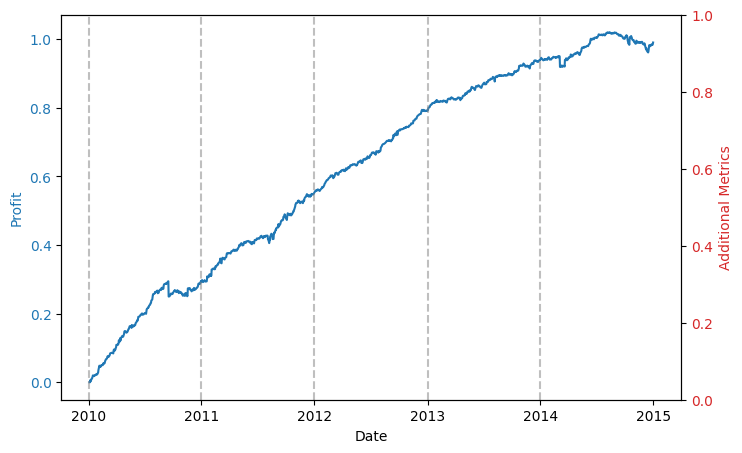

,Profit,Profit_year,Sharpe Ratio,Max Profit Year,Max Drawdown,Turnovers(Mean)
0,0.292642,0.292642,4.271139,0.292642,0.058916,0.412075
1,0.549676,0.257034,4.504031,0.292642,0.058916,0.412075
2,0.790544,0.240868,6.353219,0.292642,0.058916,0.412075
3,0.939057,0.148513,4.162989,0.292642,0.058916,0.412075
4,0.989879,0.050822,0.892473,0.292642,0.058916,0.412075


In [49]:
alphas = [alpha_1, alpha2, alpha3, alpha10, alpha44, alpha5, alpha6, alpha7, alpha8, alpha99, alpha9]


alphas_pnl = [prof(alpha, close) for alpha in alphas]


sharpe_list = [[sharpe(pnl, year=i) for i in range(4)] for pnl in alphas_pnl]


sharpe_df = pd.DataFrame(sharpe_list)


portfolio_2 = sum(alphas)


for j in range(1, 5):
    weights = sharpe_df[j-1]
    weighted_alpha = sum(alpha * weight for alpha, weight in zip(alphas, weights))
    portfolio_2.loc[f"201{j}-01-01":f"201{j}-12-31"] = weighted_alpha.loc[f"201{j}-01-01":f"201{j}-12-31"]


portfolio_2 = normalize(portfolio_2)


sharpe_df
AlphaStats(portfolio_2, close)

In [50]:
alphas = [alpha_1, alpha2, alpha3, alpha10, alpha44, alpha5, alpha6, alpha7, alpha8, alpha99, alpha9]

cumpnl_year_df = pd.DataFrame([
    [cumpnl(alpha.loc[f"201{i}-01-01":f"201{i}-12-31"]).iloc[-1] for i in range(4)]
    for alpha in alphas
])

cumpnl_year_df

,0,1,2,3
0,0.282760,0.181823,0.139205,0.100279
1,0.082598,0.084654,0.061918,0.040211
2,0.186228,0.158766,0.131352,0.197234
3,0.208668,0.156910,0.120074,0.091553
4,0.190806,0.232790,0.141239,0.087448
5,0.171462,0.176054,0.148823,0.106857
6,0.224835,0.260539,0.167674,0.049818
7,0.149086,0.634297,0.396994,0.156822
8,0.092977,-0.011510,0.035766,0.081190
9,0.227236,0.155327,0.126644,0.099157


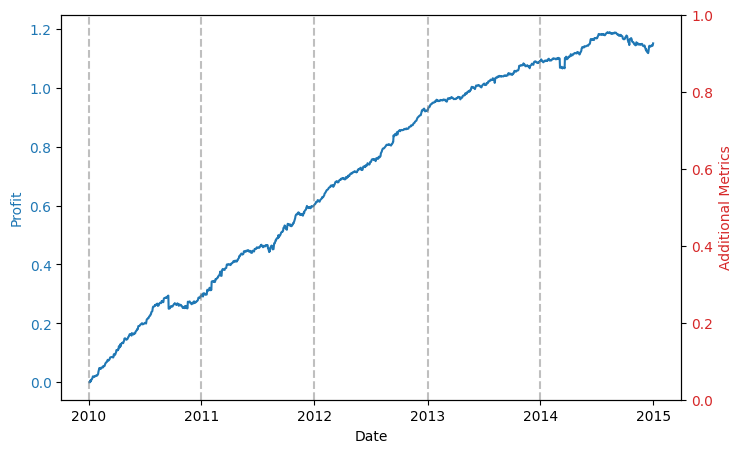

,Profit,Profit_year,Sharpe Ratio,Max Profit Year,Max Drawdown,Turnovers(Mean)
0,0.292642,0.292642,4.271139,0.321891,0.071025,0.429043
1,0.599880,0.307238,4.699516,0.321891,0.071025,0.429043
2,0.921771,0.321891,7.280177,0.321891,0.071025,0.429043
3,1.090105,0.168334,4.314787,0.321891,0.071025,0.429043
4,1.150978,0.060872,0.902554,0.321891,0.071025,0.429043


In [51]:
portfolio_3 = sum(alphas)

for j in range(1, 5):
    weights = cumpnl_year_df[j-1]
    weighted_alpha = sum(alpha * weight for alpha, weight in zip(alphas, weights))
    portfolio_3.loc[f"201{j}-01-01":f"201{j}-12-31"] = weighted_alpha.loc[f"201{j}-01-01":f"201{j}-12-31"]


portfolio_3 = normalize(portfolio_3)


AlphaStats(portfolio_3, close)